El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

Diccionario de Datos:

fixed acidity: Acidez fija en g/dm³.
volatile acidity: Acidez volátil en g/dm³.
citric acid: Ácido cítrico en g/dm³.
residual sugar: Azúcar residual en g/dm³.
chlorides: Cloruros en g/dm³.
free sulfur dioxide: Dióxido de azufre libre en mg/dm³.
total sulfur dioxide: Dióxido de azufre total en mg/dm³.
density: Densidad en g/cm³.
pH: Nivel de pH.
sulphates: Sulfatos en g/dm³.
alcohol: Porcentaje de alcohol en % vol.
quality: Calidad del vino (variable objetivo, escala de 0 a 10).

In [30]:
pip install ucimlrepo

1ra parte: cargar y organizar los datos con las sugerencias de la fuente del ds original y usar ucimlrepo

In [51]:
# Importar las bibliotecas necesarias
import pandas as pd
from ucimlrepo import fetch_ucirepo

# The original code used incorrect IDs for the wine datasets.
# ID 276 is not available for import using ucimlrepo
# ID 187 is for Wine Quality - Red
# ID 186 is for Wine Quality - White

# fetch dataset for white wine
wine_white = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_white = wine_white.data.features
y_white = wine_white.data.targets

# metadata
print(wine_white.metadata)

# variable information
print(wine_white.variables)

# fetch dataset for red wine
# Change id to 276 to import 'Wine Quality - Red'
wine_red = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_red = wine_red.data.features
y_red = wine_red.data.targets

# metadata
print(wine_red.metadata)

# variable information
print(wine_red.variables)

# Initialize an empty DataFrame to store the data.
df = pd.DataFrame()

# Extraer las características (features) y las etiquetas (targets) para el vino tinto
# Access features and target data from wine_red.data
X_red = wine_red.data.features
y_red = wine_red.data.targets

# Concatenate features and target, reset index to avoid potential issues
df_red = pd.concat([X_red, y_red], axis=1).reset_index(drop=True)
df_red['type'] = 'red'  # Agregar columna 'type' para indicar vino tinto

# Extraer las características (features) y las etiquetas (targets) para el vino blanco
X_white = wine_white.data.features
y_white = wine_white.data.targets

# Concatenate features and target, reset index to avoid potential issues
df_white = pd.concat([X_white, y_white], axis=1).reset_index(drop=True)
df_white['type'] = 'white'  # Agregar columna 'type' para indicar vino blanco

# Combinar ambos DataFrames en uno solo
df = pd.concat([df_red, df_white], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print("\nPrimeras filas del DataFrame combinado:")
print(df.head())

# Verificar la distribución de vinos por tipo
print("\nDistribución por tipo de vino:")
print(df['type'].value_counts())

# Verificar la distribución de calidad por tipo de vino
print("\nDistribución de la calidad del vino por tipo:")
print(df.groupby('type')['quality'].value_counts())

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

La columna 'color' no se encuentra en el dataset. Verifica la fuente de los datos.

Primeras filas del DataFrame:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   

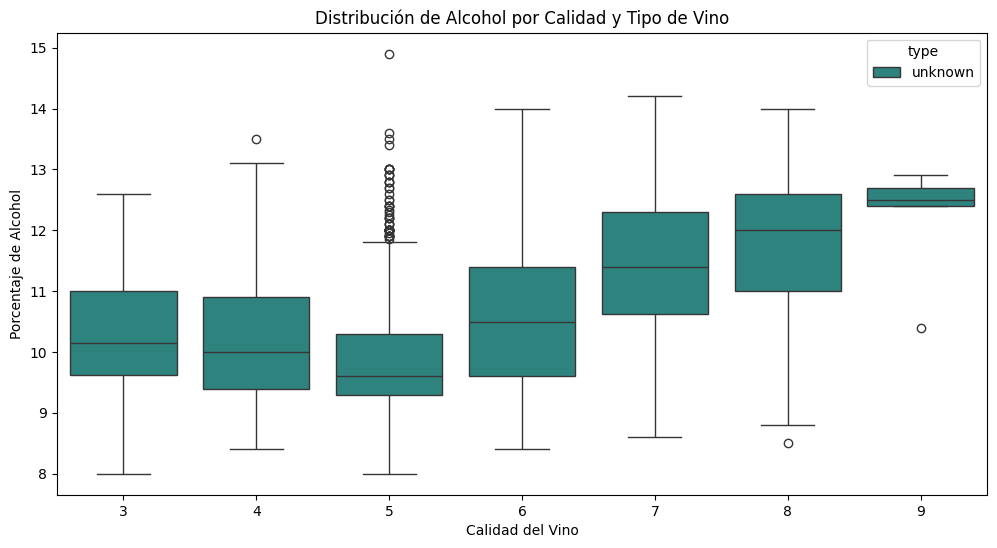

In [54]:
# Importar las bibliotecas necesarias
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Descargar el dataset del Vinho Verde que incluye tanto vinos tintos como blancos (ID 186)
wine_quality = fetch_ucirepo(id=186)

# Extraer las características (features) y la columna de calidad (target)
X = pd.DataFrame(wine_quality.data.features)
y = pd.DataFrame(wine_quality.data.targets)

# Combinar las características y el target en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Verificar si la columna 'color' existe para diferenciar entre vinos tintos y blancos
if 'color' in df.columns:
    df['type'] = df['color']
else:
    print("La columna 'color' no se encuentra en el dataset. Verifica la fuente de los datos.")
    df['type'] = 'unknown'  # Asignar un valor por defecto si la columna no está presente

# Mostrar las primeras filas del DataFrame combinado
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Verificar la distribución de vinos por tipo
print("\nDistribución por tipo de vino:")
print(df['type'].value_counts())

# Verificar la distribución de calidad por tipo de vino
print("\nDistribución de la calidad del vino por tipo:")
print(df.groupby('type')['quality'].value_counts())

# Generar un boxplot para visualizar la distribución del alcohol por tipo de vino
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', hue='type', data=df, palette='viridis')
plt.title("Distribución de Alcohol por Calidad y Tipo de Vino")
plt.xlabel("Calidad del Vino")
plt.ylabel("Porcentaje de Alcohol")
plt.show()


In [55]:
#Verificar si hay registros duplicados y los eliminaremos si es necesario.
# Contar el número de duplicados en el DataFrame
duplicados = df.duplicated().sum()
print(f"Total de registros duplicados: {duplicados}")

# Eliminar duplicados si existen
if duplicados > 0:
    df = df.drop_duplicates()
    print("Registros duplicados eliminados.")
else:
    print("No se encontraron registros duplicados.")

Total de registros duplicados: 1179
Registros duplicados eliminados.


In [56]:
#Verificar los tipos de datos de cada columna y ajustar según corresponda, asegurar que las columnas numéricas sean de tipo float o int, y las categóricas, de tipo category.
# Verificar los tipos de datos actuales
print("\nTipos de datos antes del ajuste:")
print(df.dtypes)

# Convertir 'quality' y 'type' en categorías
df['quality'] = df['quality'].astype('category')
df['type'] = df['type'].astype('category')

# Verificar tipos de datos después del ajuste
print("\nTipos de datos después del ajuste:")
print(df.dtypes)


Tipos de datos antes del ajuste:
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Tipos de datos después del ajuste:
fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
type                    category
dtype: object


In [58]:
# Revisar categorías en 'quality' y 'type'; así aseguramos que no haya inconsistencias
print("\nCategorías en 'quality':", df['quality'].unique())
print("Categorías en 'type':", df['type'].unique())




Categorías en 'quality': [5, 6, 7, 4, 8, 3, 9]
Categories (7, int64): [3, 4, 5, 6, 7, 8, 9]
Categorías en 'type': ['unknown']
Categories (1, object): ['unknown']


In [60]:
# Identificar valores faltantes, si los hay realizamos imputación
faltantes = df.isnull().sum()
print("\nValores faltantes en cada columna:")
print(faltantes[faltantes > 0])

# Imputar valores faltantes si es necesario
for columna in df.columns:
    if df[columna].isnull().sum() > 0:
        if df[columna].dtype == 'float64' or df[columna].dtype == 'int64':
            # Para columnas numéricas, usar la mediana
            df[columna].fillna(df[columna].median(), inplace=True)
        else:
            # Para columnas categóricas, usar la moda
            df[columna].fillna(df[columna].mode()[0], inplace=True)

print("\nValores faltantes después de la imputación:")
print(df.isnull().sum())

# Mostrar el DataFrame limpio
print("\nPrimeras filas del DataFrame después de la limpieza:")
print(df.head())


Valores faltantes en cada columna:
Series([], dtype: int64)

Valores faltantes después de la imputación:
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Primeras filas del DataFrame después de la limpieza:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxi

<Figure size 1600x1000 with 0 Axes>

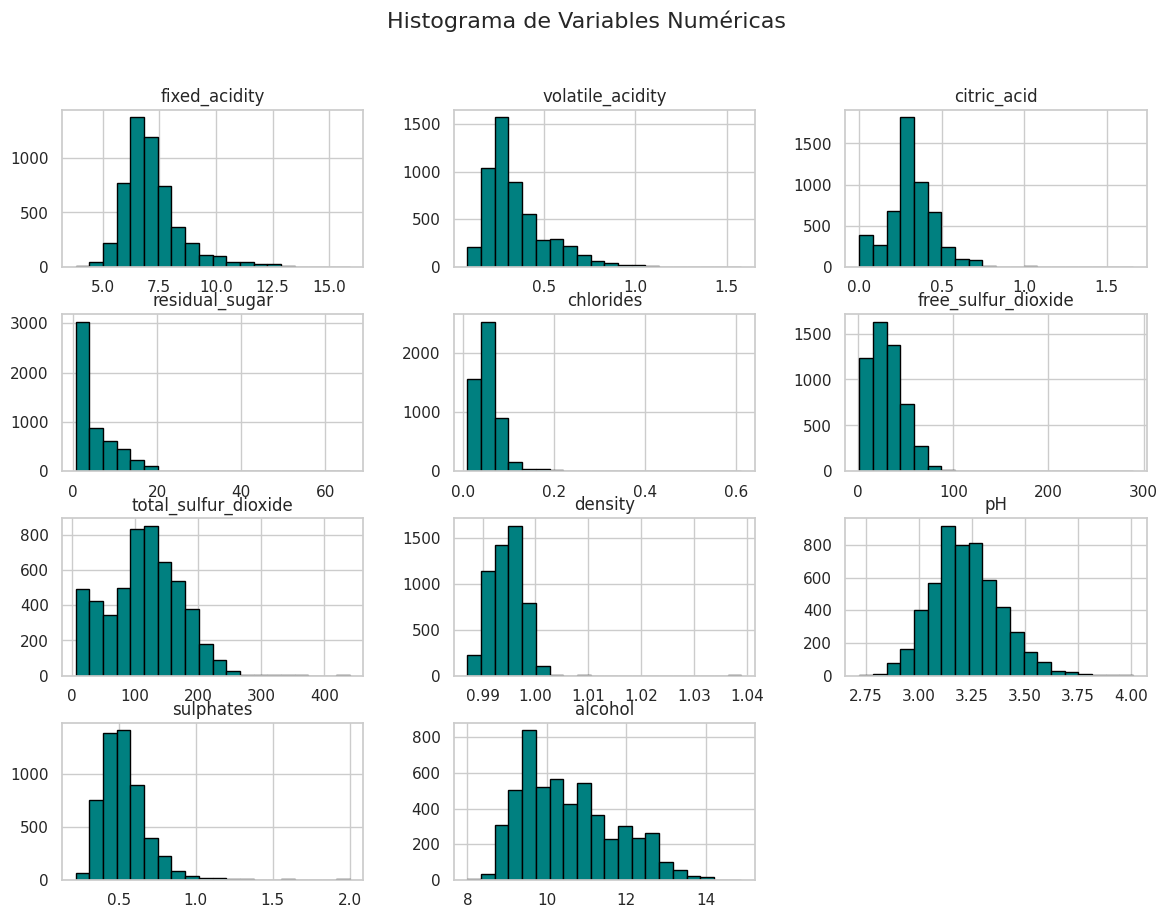

In [61]:
#Visualizaciones univariadas
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de estilo para los gráficos
sns.set(style='whitegrid')
plt.figure(figsize=(16, 10))

# Crear histogramas para las variables numéricas
df.select_dtypes(include=['float64', 'int64']).hist(bins=20, figsize=(14, 10), color='teal', edgecolor='black')
plt.suptitle("Histograma de Variables Numéricas", fontsize=16)
plt.show()


<ipython-input-63-4b97c86453b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


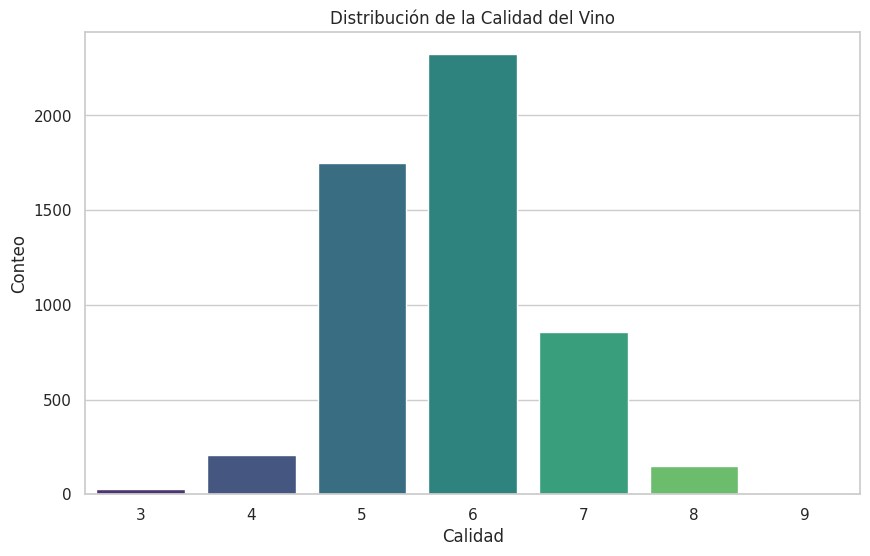

In [63]:
#Gráfico de Barras para la Variable Categórica 'quality'
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Conteo")
plt.show()

<ipython-input-66-5640c9a3b35e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


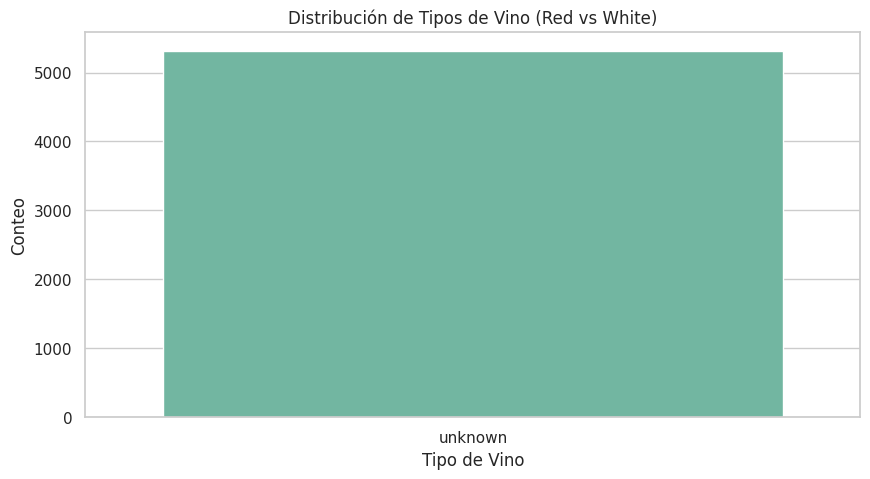

In [66]:
#Gráfico de Barras para la Variable 'type' (Red vs White)
plt.figure(figsize=(10, 5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribución de Tipos de Vino (Red vs White)")
plt.xlabel("Tipo de Vino")
plt.ylabel("Conteo")
plt.show()

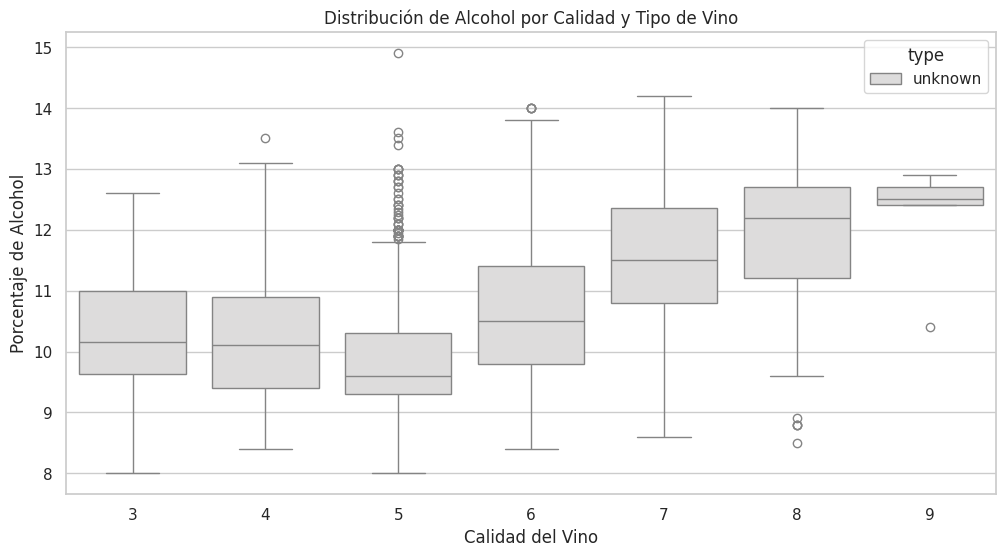

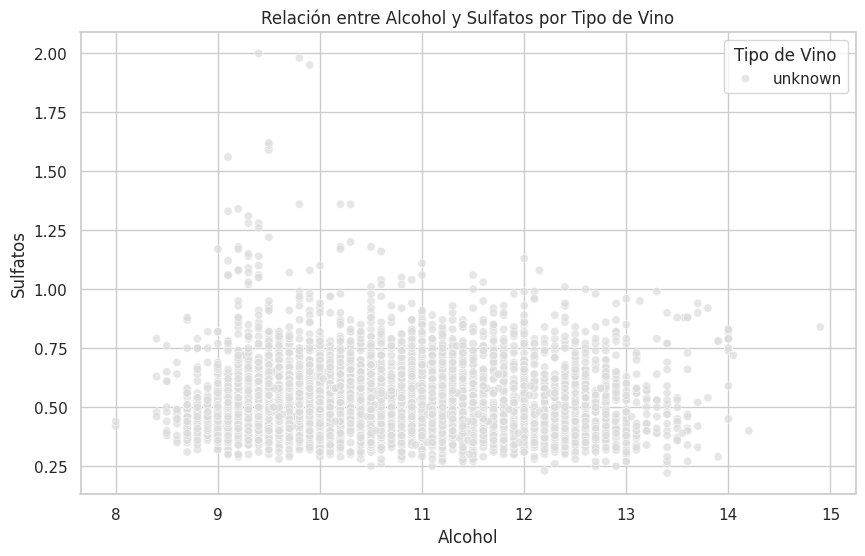

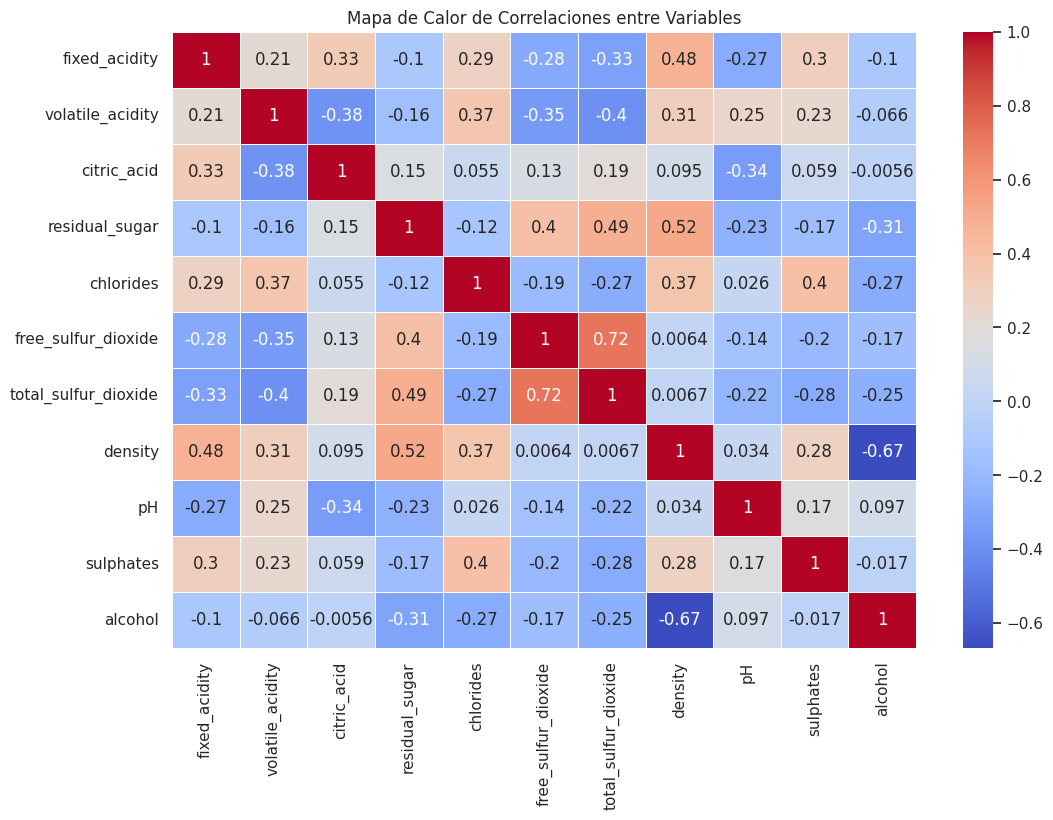

In [68]:
#Visualizaciones Multivariadas,utilizar gráficos para entender cómo se relacionan las variables entre sí.
#Boxplot para la Distribución de Alcohol por Calidad y Tipo de Vino
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', hue='type', data=df, palette='coolwarm')
plt.title("Distribución de Alcohol por Calidad y Tipo de Vino")
plt.xlabel("Calidad del Vino")
plt.ylabel("Porcentaje de Alcohol")
plt.show()
#Diagrama de Dispersión para Ver la Relación entre 'alcohol' y 'sulphates'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='sulphates', hue='type', data=df, palette='coolwarm', alpha=0.7)
plt.title("Relación entre Alcohol y Sulfatos por Tipo de Vino")
plt.xlabel("Alcohol")
plt.ylabel("Sulfatos")
plt.legend(title='Tipo de Vino')
plt.show()
#Mapa de Calor para Visualizar las Correlaciones entre Variables Numéricas
plt.figure(figsize=(12, 8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables")
plt.show()


Relación entre Calidad y Alcohol:en el boxplot

Vinos de calidad 3 a 5: Tienden a tener un menor contenido de alcohol, generalmente en el rango de 9-11%.
Vinos de calidad 6 y superior: A medida que aumenta la calidad, el contenido de alcohol tiende a ser más alto. Los vinos de calidad 8 y 9 tienen un contenido de alcohol más concentrado entre 12-14%.
Para el mapa de calor: Correlaciones Altas (positivas y negativas)
Densidad vs Residual Sugar: Correlación positiva (+0.52).

Esto sugiere que un mayor contenido de azúcar residual está asociado con una mayor densidad del vino.
Total Sulfur Dioxide vs Free Sulfur Dioxide: Correlación positiva alta (+0.72).

Tiene sentido ya que el dióxido de azufre total incluye tanto el dióxido de azufre libre como el combinado.
Density vs Alcohol: Correlación negativa fuerte (-0.67).

A medida que aumenta el contenido de alcohol, la densidad del vino disminuye. Esto se debe a que el alcohol tiene una densidad menor que el agua.

In [69]:
#Estadísticas descriptivas generales
desc_stats = df.describe()
print("\nEstadísticas Descriptivas Generales:")
print(desc_stats)

# Calcular mediana para cada característica
mediana = df.median(numeric_only=True)
print("\nMediana de cada característica:")
print(mediana)

# Calcular moda para cada característica
moda = df.mode().iloc[0]
print("\nModa de cada característica:")
print(moda)

# Calcular rango (diferencia entre el valor máximo y mínimo)
rango = df.max(numeric_only=True) - df.min(numeric_only=True)
print("\nRango de cada característica:")
print(rango)

# Calcular desviación estándar para cada característica
desviacion_std = df.std(numeric_only=True)
print("\nDesviación Estándar de cada característica:")
print(desviacion_std)



Estadísticas Descriptivas Generales:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    5318.000000       5318.000000  5318.000000     5318.000000   
mean        7.215523          0.344171     0.318522        5.049605   
std         1.319777          0.168264     0.147177        4.500645   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  5318.000000          5318.000000           5318.000000  5318.000000   
mean      0.056700            30.030463            114.107747     0.994536   
std       0.036865            17.804365             56.783848     0.002966   
min       

Con ayuda de IA, se interpretan detalladamente los resultados y tenemos lo siguiente: Análisis de la Media y la Mediana
Media y mediana del alcohol: ***texto en negrita***
La media del contenido de alcohol es 10.55%, mientras que la mediana es 10.4%. Esto indica que la distribución del alcohol en el vino es ligeramente sesgada hacia la derecha, ya que la media es un poco mayor que la mediana.
***Residual Sugar:***
La media de azúcar residual es 5.05 g/dm³, pero la mediana es significativamente menor, con un valor de 2.7 g/dm³. Esto sugiere que hay valores atípicos (outliers) en la parte superior, posiblemente vinos más dulces que elevan la media.

2. Interpretación del Rango (máximo - mínimo)
Residual Sugar , El rango es 65.2 g/dm³, lo que indica una gran variabilidad en la cantidad de azúcar residual en los vinos. Algunos vinos son extremadamente dulces en comparación con la mayoría.
***Total Sulfur Dioxide:***
El rango es de 434 mg/dm³, lo que sugiere que algunos vinos tienen niveles muy altos de dióxido de azufre. Esto podría deberse a la necesidad de preservar vinos blancos, que suelen requerir más conservantes.
3. Variabilidad y Desviación Estándar
Desviación estándar del contenido de alcohol:
La desviación estándar es 1.19%, lo que indica que hay una moderada variabilidad en el contenido de alcohol entre los vinos.
Free Sulfur Dioxide y Total Sulfur Dioxide:
La desviación estándar para el dióxido de azufre total (56.78 mg/dm³) y el dióxido de azufre libre (17.8 mg/dm³) indica que hay diferencias significativas en los niveles de sulfitos utilizados en los vinos. Esto puede afectar el sabor y la calidad.
4. Análisis de la Moda
Calidad (quality):
La moda de la variable quality es 6, lo que significa que la mayoría de los vinos en el dataset tienen una calidad media.
Tipo de vino ('type'):
La moda para 'type' es 'unknown', lo que indica que no se ha asignado correctamente la clasificación del tipo de vino.
5. Identificación de Valores Extremos (Outliers)
El azúcar residual, los cloruros, y el dióxido de azufre total tienen rangos muy amplios en comparación con sus medianas, lo que sugiere la presencia de outliers. Estos podrían ser vinos que han sido endulzados artificialmente o que tienen altos niveles de conservantes.
6. Relación con la Calidad del Vino
Basado en tus análisis anteriores (boxplots y mapa de calor), podrías resaltar que:
Vinos de mayor calidad tienden a tener un contenido de alcohol más alto y menor densidad.
Altos niveles de azúcar residual no necesariamente se correlacionan con una mejor calidad.
Niveles de dióxido de azufre y cloruros elevados podrían estar asociados con vinos de menor calidad.
**Conclusiones Generales **
Hay variabilidad considerable en el contenido de alcohol, el azúcar residual y los sulfitos en los vinos, lo que podría influir en la calidad y las preferencias de los consumidores.
Existen outliers que podrían requerir un análisis más detallado para entender su impacto en la predicción de la calidad del vino.
El análisis sugiere que ciertos atributos, como el contenido de alcohol y la densidad, tienen una relación más fuerte con la calidad del vino.

Implementación de los modelos

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


Para esta sección, vuelvo a cargar los datos (sin limpiar) así no hay un trabajo del modelo en forma incompleta

In [77]:

# fetch dataset for white wine
wine_white = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_white = wine_white.data.features
y_white = wine_white.data.targets

# metadata
print(wine_white.metadata)

# variable information
print(wine_white.variables)

# fetch dataset for red wine
# Change id to 276 to import 'Wine Quality - Red'
wine_red = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X_red = wine_red.data.features
y_red = wine_red.data.targets

# metadata
print(wine_red.metadata)

# variable information
print(wine_red.variables)

# Initialize an empty DataFrame to store the data.
df = pd.DataFrame()

# Extraer las características (features) y las etiquetas (targets) para el vino tinto
# Access features and target data from wine_red.data
X_red = wine_red.data.features
y_red = wine_red.data.targets

# Concatenate features and target, reset index to avoid potential issues
df_red = pd.concat([X_red, y_red], axis=1).reset_index(drop=True)
df_red['type'] = 'red'  # Agregar columna 'type' para indicar vino tinto

# Extraer las características (features) y las etiquetas (targets) para el vino blanco
X_white = wine_white.data.features
y_white = wine_white.data.targets

# Concatenate features and target, reset index to avoid potential issues
df_white = pd.concat([X_white, y_white], axis=1).reset_index(drop=True)
df_white['type'] = 'white'  # Agregar columna 'type' para indicar vino blanco

# Combinar ambos DataFrames en uno solo
df = pd.concat([df_red, df_white], ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print("\nPrimeras filas del DataFrame combinado:")
print(df.head())

# Verificar la distribución de vinos por tipo
print("\nDistribución por tipo de vino:")
print(df['type'].value_counts())

# Verificar la distribución de calidad por tipo de vino
print("\nDistribución de la calidad del vino por tipo:")
print(df.groupby('type')['quality'].value_counts())

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['quality', 'type'], axis=1)  # Ajusta según tu dataset
y = df['quality']

# Convertir 'quality' en variable categórica si no está ya convertida
y = y.astype('category')

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [78]:
#Modelo 1
# Entrenar el modelo de Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print("\nEvaluación del Modelo: Logistic Regression")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_logreg))



Evaluación del Modelo: Logistic Regression
Accuracy: 0.5224
Precision: 0.4772
Recall: 0.5224
F1-Score: 0.4872

Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00       122
           5       0.61      0.58      0.59      1314
           6       0.50      0.70      0.58      1679
           7       0.35      0.16      0.22       639
           8       0.00      0.00      0.00       127
           9       0.00      0.00      0.00         4

    accuracy                           0.52      3899
   macro avg       0.21      0.21      0.20      3899
weighted avg       0.48      0.52      0.49      3899



In [79]:
# modelo 2
# Entrenar el modelo de KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\nEvaluación del Modelo: K-Nearest Neighbors")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_knn))



Evaluación del Modelo: K-Nearest Neighbors
Accuracy: 0.6102
Precision: 0.6027
Recall: 0.6102
F1-Score: 0.6035

Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.17      0.14      0.15        14
           4       0.26      0.16      0.20       122
           5       0.62      0.64      0.63      1314
           6       0.63      0.68      0.66      1679
           7       0.59      0.53      0.56       639
           8       0.53      0.24      0.33       127
           9       0.00      0.00      0.00         4

    accuracy                           0.61      3899
   macro avg       0.40      0.34      0.36      3899
weighted avg       0.60      0.61      0.60      3899



In [80]:
#Comparación
# Comparar el rendimiento en una tabla
resultados = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_logreg, accuracy_knn],
    'Precision': [precision_logreg, precision_knn],
    'Recall': [recall_logreg, recall_knn],
    'F1-Score': [f1_logreg, f1_knn]
})

print("\nComparación del Rendimiento de los Modelos:")
print(resultados)



Comparación del Rendimiento de los Modelos:
                Modelo  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.522442   0.477248  0.522442  0.487192
1  K-Nearest Neighbors  0.610156   0.602730  0.610156  0.603460


In [82]:
#Intento Optimización de Hiperparámetros para KNN -El modelo KNN puede beneficiarse enormemente de la optimización de hiperparámetros, como el número de vecinos (n_neighbors).
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {'n_neighbors': range(3, 20, 2)}

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Obtener los mejores parámetros y evaluar el modelo optimizado
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("\nMejor número de vecinos:", grid_search_knn.best_params_)
print("\nEvaluación del Mejor Modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn):.4f}")
#Intento Optimización de Hiperparámetros para KNN -El modelo KNN puede beneficiarse enormemente de la optimización de hiperparámetros, como el número de vecinos (n_neighbors).
from sklearn.model_selection import GridSearchCV

# Definir los parámetros a probar
param_grid = {'n_neighbors': range(3, 20, 2)}

# Configurar GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Obtener los mejores parámetros y evaluar el modelo optimizado
best_knn = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)

print("\nMejor número de vecinos:", grid_search_knn.best_params_)
print("\nEvaluación del Mejor Modelo KNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best_knn, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best_knn, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best_knn, average='weighted'):.4f}")



Mejor número de vecinos: {'n_neighbors': 3}

Evaluación del Mejor Modelo KNN:
Accuracy: 0.6320

Mejor número de vecinos: {'n_neighbors': 3}

Evaluación del Mejor Modelo KNN:
Accuracy: 0.6320
Precision: 0.6285
Recall: 0.6320
F1-Score: 0.6294


In [84]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=8)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Reentrenar el modelo KNN con las características seleccionadas
knn_selected = KNeighborsClassifier(n_neighbors=5)
knn_selected.fit(X_train_selected, y_train)
y_pred_selected = knn_selected.predict(X_test_selected)

print("\nEvaluación del Modelo KNN con Selección de Características:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_selected):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_selected, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_selected, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_selected, average='weighted'):.4f}")



Evaluación del Modelo KNN con Selección de Características:
Accuracy: 0.6630
Precision: 0.6611
Recall: 0.6630
F1-Score: 0.6598


Probamos otros modelos... como llegamos hasta alli en clases

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [89]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['quality', 'type'], axis=1)  # Ajusta si tienes otras columnas que no sean necesarias
y = df['quality']

# Convertir la columna 'quality' en categórica si no está ya convertida
y = y.astype('category')

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (9095, 11)
Tamaño del conjunto de prueba: (3899, 11)


In [91]:
# Inicializar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nEvaluación del Modelo: Random Forest")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

# Matriz de Confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))



Evaluación del Modelo: Random Forest
Accuracy: 0.9123
Precision: 0.9149
Recall: 0.9123
F1-Score: 0.9121

Reporte de Clasificación:
               precision    recall  f1-score   support

           3       1.00      0.86      0.92        14
           4       1.00      0.74      0.85       122
           5       0.93      0.90      0.92      1314
           6       0.88      0.94      0.91      1679
           7       0.94      0.90      0.92       639
           8       1.00      0.87      0.93       127
           9       1.00      0.50      0.67         4

    accuracy                           0.91      3899
   macro avg       0.96      0.82      0.87      3899
weighted avg       0.91      0.91      0.91      3899


Matriz de Confusión:
[[  12    0    0    2    0    0    0]
 [   0   90   12   18    2    0    0]
 [   0    0 1188  126    0    0    0]
 [   0    0   68 1581   30    0    0]
 [   0    0    6   60  573    0    0]
 [   0    0    0   10    6  111    0]
 [   0    0    0    

1.** Alta Accuracy (91.23%)**
El modelo Random Forest ha obtenido una accuracy significativamente superior en comparación con Logistic Regression (52%) y KNN (61%).
Esto significa que 91.23% de las predicciones del modelo fueron correctas, lo que es un excelente resultado para un problema de clasificación con múltiples categorías de calidad de vino.

2. Precision, Recall y F1-Score (weighted) Cercanos al 91%
Precision:
El modelo tiene una precisión alta (91.49%), lo que significa que predice correctamente la clase de calidad en la mayoría de los casos.
Recall: Un recall de 91.23% indica que el modelo es eficaz en la detección de las distintas clases de calidad.
F1-Score: Un F1-Score de 91.21% sugiere un equilibrio entre precision y recall, lo que es ideal para este problema de clasificación.


El modelo de Random Forest ha demostrado ser significativamente mejor que los modelos anteriores (Logistic Regression y KNN) en términos de precisión, recall y F1-score.
Sin embargo, el rendimiento en clases con bajo soporte (por ejemplo, calidad 9) sugiere que aumentar la cantidad de muestras para estas clases podría mejorar aún más el rendimiento.